<a href="https://colab.research.google.com/github/kimsoomin20221789/PyTorchExercise/blob/main/Lab08(2)_MultiLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XOR 문제를 해결하기 위해서는 한개의 Layer를 가진 perceptron으로는 해결할 수 없다.

> Multi Layer Perceptron 모델이 필요하다.



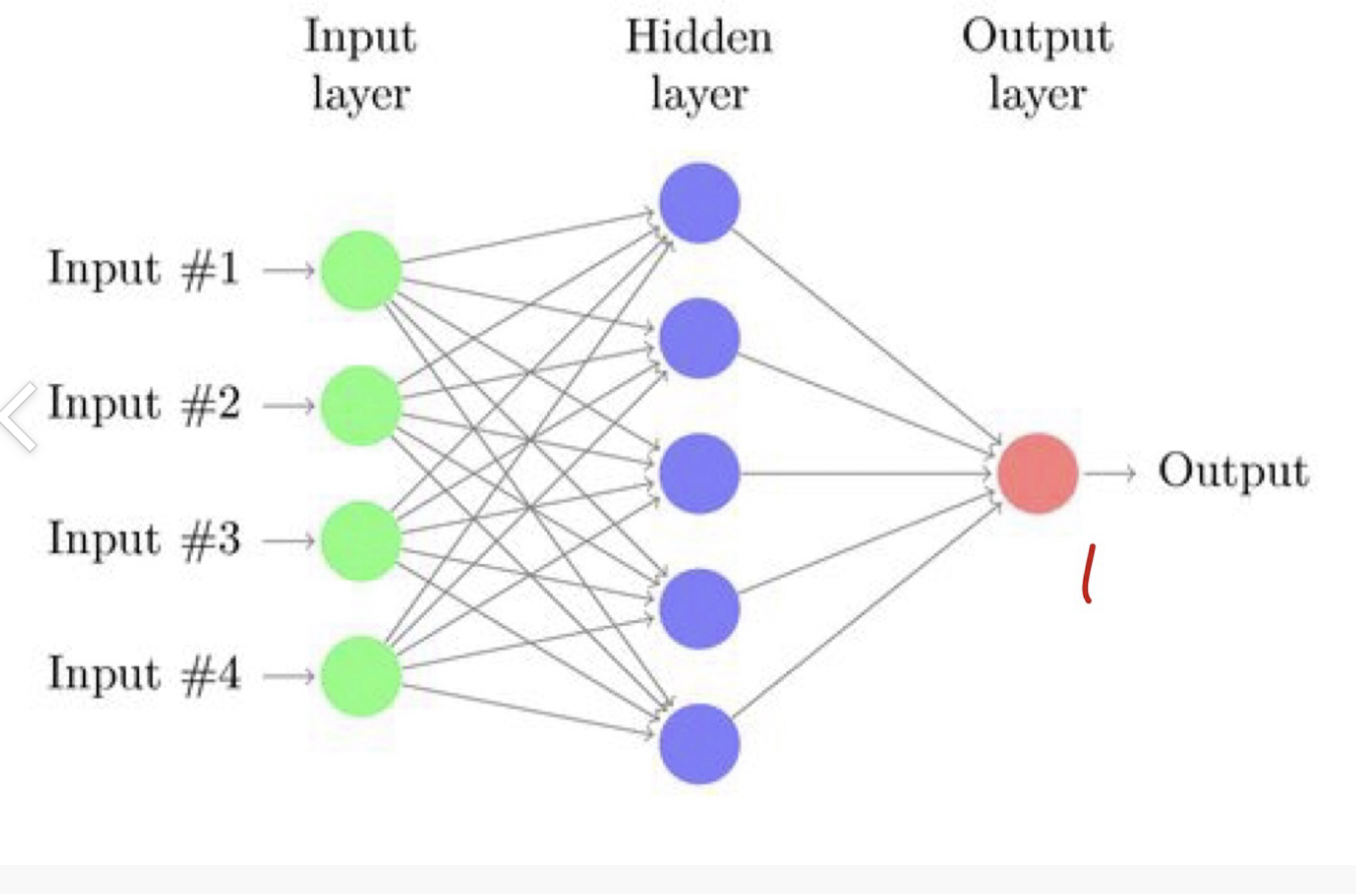

In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# nn Linears
linear1 = torch.nn.Linear(2, 2, bias = True)
linear2 = torch.nn.Linear(2, 1, bias = True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)

In [2]:
# cost/Loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [4]:
for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)
  cost = criterion(hypothesis, Y)
  cost.backward() #backpropagation = cost(= loss) (= Binary Cross Entrpoy 를 미분한 식)
  optimizer.step()
  if step%100 == 0:
    print(step, cost.item())

0 0.6645019054412842
100 0.475631445646286
200 0.2069798856973648
300 0.11001994460821152
400 0.07176180928945541
500 0.052476461976766586
600 0.04109606519341469
700 0.03365863859653473
800 0.028444629162549973
900 0.024598535150289536
1000 0.021650411188602448
1100 0.019321752712130547
1200 0.017437772825360298
1300 0.015883300453424454
1400 0.014579576440155506
1500 0.013470921665430069
1600 0.0125169288367033
1700 0.011687563732266426
1800 0.010960071347653866
1900 0.010316893458366394
2000 0.00974428839981556
2100 0.009231245145201683
2200 0.008769000880420208
2300 0.008350469172000885
2400 0.007969718426465988
2500 0.007621860597282648
2600 0.007302869111299515
2700 0.007009298540651798
2800 0.006738228257745504
2900 0.0064871893264353275
3000 0.006254062056541443
3100 0.006036990322172642
3200 0.0058343177661299706
3300 0.005644798278808594
3400 0.005467062816023827
3500 0.005300167016685009
3600 0.005143053829669952
3700 0.004994926042854786
3800 0.004855044186115265
3900 0.004